# Importation Bibliothèques

In [1]:
import gymnasium as gym
import bbrl_gymnasium
from moviepy.editor import ipython_display as video_display
from RewardWrapper import RewardWrapper
from Algorithms import PrioritizedReplayAgent
import matplotlib.pyplot as plt

from LargestFirst import LargestFirst
from RandomDyna import RandomDyna
from FocusedDyna import FocusedDyna

import pandas as pd
import numpy as np

from omegaconf import OmegaConf
# Load YAML config file as DictConfig
config = OmegaConf.load("config.yaml")

Matplotlib backend: module://matplotlib_inline.backend_inline


# Paramètres

In [2]:
EPSILON = config.main.epsilon  # parametres pour gerer l'exploration dans EPSILONgreedy
DELTA = config.main.delta  #treshold
gamma = config.main.gamma  #discount factor
ALPHA = config.main.alpha   #learning rate
MAX_STEP = config.main.max_step #nombre de pas maximum pour un episode

# Définition des labyrinthes

In [3]:
# environnement 9x6 
env_9x6 = gym.make("MazeMDP-v0", kwargs={"width": 9, "height": 6,
"start_states": [2], "walls": [13, 14, 15, 34, 42, 43, 44],
"terminal_states": [41]}, render_mode="rgb_array")

env_9x6.metadata['render_fps'] = 1
env_9x6 = RewardWrapper(env_9x6)
env_9x6.reset()

env_9x6.set_no_agent()
env_9x6.init_draw("The maze 9x6")

# environnement 18x12
env_18x12 = gym.make("MazeMDP-v0", kwargs={"width": 18, "height": 12,
"start_states": [4], "walls": [50,51,52,53,54,62,63,64,65,66, 128,129,140,141,168,169,170,171,172,173,180,181,182,183,184,185],
"terminal_states": [166,167,178,179]}, render_mode="rgb_array")

env_18x12.metadata['render_fps'] = 1
env_18x12 = RewardWrapper(env_18x12)
env_18x12.reset()

env_18x12.set_no_agent()
env_18x12.init_draw("The maze 18x12")


Output()

Output()

# Largest First Dyna

### Queue Dyna Priority Based on Prediction Difference Magnitude

In [ ]:
QueueDyna = LargestFirst(env_9x6, ALPHA, DELTA, EPSILON,MAX_STEP, render = True, episode= 100)
QueueDyna.execute()


In [ ]:
data = pd.read_csv("executionInformation.csv")

nb_steps = data.iloc[:, 1].tolist()
nb_backup = data.iloc[:,0].tolist()

plt.plot(nb_backup,nb_steps)


plt.title('Courbe du nombre de step to goal en fonction du nombre de backup')
plt.xlabel('nb_backup')
plt.ylabel('nb_step')
plt.xscale('log')
plt.grid(True)
plt.show()

# Random Dyna

In [ ]:
RDyna = RandomDyna(env_9x6, ALPHA, DELTA, EPSILON, MAX_STEP, render = True, episode= 100)
RDyna.execute()

In [ ]:
data = pd.read_csv("executionInformation.csv")

nb_steps = data.iloc[:, 1].tolist()
nb_backup = data.iloc[:,0].tolist()

plt.plot(nb_backup,nb_steps)

plt.title('Courbe du nombre de step to goal en fonction du nombre de backup')
plt.xlabel('nb_backup')
plt.ylabel('nb_step')
plt.xscale('log')
plt.grid(True)
plt.show()


# Focused Dyna

In [ ]:
FDyna = FocusedDyna(env_9x6, ALPHA, DELTA, EPSILON,MAX_STEP, render = True, episode= 100)
FDyna.execute()


In [ ]:
data = pd.read_csv("executionInformation.csv")

nb_steps = data.iloc[:, 1].tolist()
nb_backup = data.iloc[:,0].tolist()

plt.plot(nb_backup,nb_steps)


plt.title('Courbe du nombre de step to goal en fonction du nombre de backup')
plt.xlabel('nb_backup')
plt.ylabel('nb_step')
plt.xscale('log')
plt.grid(True)
plt.show()

# Test SR

In [4]:
from SuccessorRepresentation import FocusedDynaSR

## Small labyrinth

In [13]:
fdsr = FocusedDynaSR(env_9x6, ALPHA, EPSILON, config.sr.episode, config.sr.small.train_episode_length, config.sr.small.test_episode_length)
fdsr.execute()

In [14]:
print("longueur du chemin au but minimal :",fdsr.optimal_path_length())

longueur du chemin au but minimal : 13


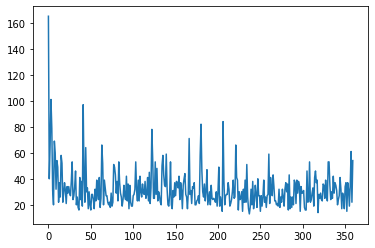

In [15]:
plt.plot(fdsr.test_lengths)
plt.savefig("img/SR-performance.png")

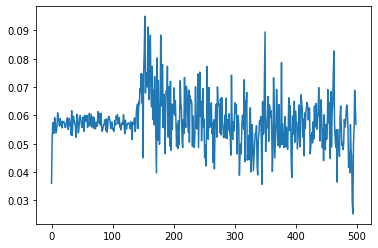

In [16]:
plt.plot(fdsr.lifetime_td_errors)

# Figure 8

In [ ]:
fdsr = FocusedDynaSR(env_18x12, ALPHA, EPSILON, config.sr.episode, config.sr.grand.train_episode_length, config.sr.grand.test_episode_length)
fdsr.execute()

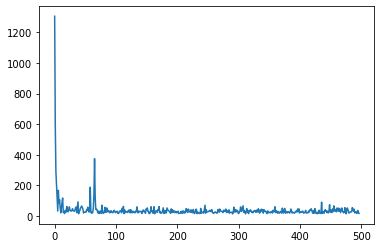

In [ ]:
plt.plot(fdsr.test_lengths)
plt.savefig("img/SR-performance.png")

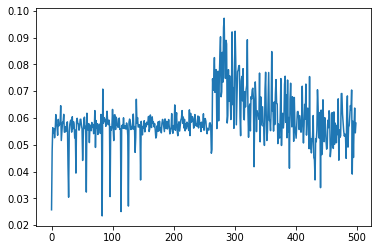

In [ ]:
plt.plot(fdsr.lifetime_td_errors)

# Focus Dyna

In [ ]:
QueueDyna = FocusedDyna(env_9x6, ALPHA, DELTA, EPSILON,MAX_STEP, render = False, episode= 1000)
QueueDyna.execute()

In [ ]:
data = pd.read_csv("executionInformation.csv")

nb_steps = data["nb_step"]
nb_backup = data["nb_backup"]

plt.plot(nb_backup,nb_steps)


plt.title('Courbe du nombre de step to goal en fonction du nombre de backup')
plt.xlabel('nb_backup')
plt.ylabel('nb_step')
plt.xscale('log')
plt.grid(True)
plt.show()

In [21]:

from scipy.interpolate import interp1d

all_steps_lg = []
all_backups_lg = []

all_steps_rd = []
all_backups_rd = []

all_steps_fc = []
all_backups_fc = []

for i in range(30):
    QueueDyna = LargestFirst(env_9x6, ALPHA, DELTA, EPSILON,MAX_STEP, render = False, episode= 100)
    QueueDyna.execute()
    data = pd.read_csv("executionInformation.csv")

    nb_steps = data.iloc[:, 1].tolist()
    nb_backup = data.iloc[:,0].tolist()
    all_steps_lg.append(nb_steps)
    all_backups_lg.append(nb_backup)

    RDyna = RandomDyna(env_9x6, ALPHA, DELTA, EPSILON,MAX_STEP, render = False, episode= 100)
    RDyna.execute()
    data = pd.read_csv("executionInformation.csv")

    nb_steps = data.iloc[:, 1].tolist()
    nb_backup = data.iloc[:,0].tolist()
    all_steps_rd.append(nb_steps)
    all_backups_rd.append(nb_backup)

    FDyna = FocusedDyna(env_9x6, ALPHA, DELTA, EPSILON,MAX_STEP, render = False, episode= 100)
    FDyna.execute()
    data = pd.read_csv("executionInformation.csv")

    nb_steps = data.iloc[:, 1].tolist()
    nb_backup = data.iloc[:,0].tolist()
    all_steps_fc.append(nb_steps)
    all_backups_fc.append(nb_backup)
    

num_points_interp = min([len(i) for i in all_backups_lg])
interp_data = []
for curve in all_steps_lg:
    x_old = np.linspace(0, 1, len(curve))
    x_new = np.linspace(0, 1, num_points_interp)
    f = interp1d(x_old, curve, kind='cubic')
    interp_data.append(f(x_new))

average_curve_lg = np.mean(interp_data, axis=0)
plt.plot(average_curve_lg, color='red', linewidth=2)

num_points_interp = min([len(i) for i in all_backups_rd])
interp_data = []
for curve in all_steps_lg:
    x_old = np.linspace(0, 1, len(curve))
    x_new = np.linspace(0, 1, num_points_interp)
    f = interp1d(x_old, curve, kind='cubic')
    interp_data.append(f(x_new))

average_curve_rd = np.mean(interp_data, axis=0)
plt.plot(average_curve_rd, color='blue', linewidth=2)

num_points_interp = min([len(i) for i in all_backups_fc])
interp_data = []
for curve in all_steps_fc:
    x_old = np.linspace(0, 1, len(curve))
    x_new = np.linspace(0, 1, num_points_interp)
    f = interp1d(x_old, curve, kind='cubic')
    interp_data.append(f(x_new))

average_curve_fc = np.mean(interp_data, axis=0)
plt.plot(average_curve_fc, color='green', linewidth=2)




plt.title('Courbe du nombre de step to goal en fonction du nombre de backup')
plt.xlabel('nb_backup')
plt.ylabel('nb_step')
plt.xscale('log')
plt.grid(True)
plt.show()


KeyboardInterrupt: 